In [35]:
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [60]:
key = 'c9f5b49eab51e5a3a98bae35a9bcbb88'
weather_cache = {}

In [78]:
def get_weather_data(prediction_time):
    if prediction_time in weather_cache:
        return weather_cache[prediction_time]
    sim_center = key, 35.042677, -85.299246
    sim_center = forecast(*sim_center, time=prediction_time.isoformat())
    weather_cache[prediction_time] = sim_center['currently']
    return sim_center['currently']

In [79]:
def convert_time(str_time):
    return dt.strptime(str_time, "%Y-%m-%d %H:%M:%S")

def first_cleansing_step(data):
    data['Time'] = data['Time'].apply(convert_time)
    return data

def filter_weather(weather):
    return weather

In [90]:
def add_weather(dataset):
    res = []
    for _, item in dataset.iterrows():
        weather_data = get_weather_data(item["Time"])
        res.append({**item, **weather_data})
    return res

In [91]:
traffic_data = pd.read_csv("traffic.csv", sep=";")
pollution_data = pd.read_csv("pollution.csv", sep=";")
traffic_data = first_cleansing_step(traffic_data)
pollution_data = first_cleansing_step(pollution_data)

In [92]:
w_pollution_data = add_weather(pollution_data)

In [96]:
weather_cache

{Timestamp('2019-03-25 20:50:00'): {'time': 1553561400,
  'summary': 'Light Rain',
  'icon': 'rain',
  'precipIntensity': 0.0117,
  'precipProbability': 0.84,
  'precipType': 'rain',
  'temperature': 58.68,
  'apparentTemperature': 58.68,
  'dewPoint': 53.72,
  'humidity': 0.84,
  'pressure': 1015.27,
  'windSpeed': 2.77,
  'windGust': 7.59,
  'windBearing': 345,
  'cloudCover': 0.77,
  'uvIndex': 0,
  'visibility': 7.08,
  'ozone': 318.14},
 Timestamp('2019-03-25 21:00:00'): {'time': 1553562000,
  'summary': 'Drizzle',
  'icon': 'rain',
  'precipIntensity': 0.0079,
  'precipProbability': 0.85,
  'precipType': 'rain',
  'temperature': 58.61,
  'apparentTemperature': 58.61,
  'dewPoint': 53.69,
  'humidity': 0.84,
  'pressure': 1015.39,
  'windSpeed': 2.66,
  'windGust': 7.38,
  'windBearing': 347,
  'cloudCover': 0.77,
  'uvIndex': 0,
  'visibility': 7.51,
  'ozone': 319.06},
 Timestamp('2019-03-25 21:10:00'): {'time': 1553562600,
  'summary': 'Drizzle',
  'icon': 'rain',
  'precipInte

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
def correlation_series(X, Y):
    X_mean = np.mean(X)
    X_std = np.std(X)
    Y_mean = np.mean(Y)
    Y_std = np.std(Y)
    return [(x - X_mean) * (y - Y_mean) / (X_std * Y_std) for x,y in zip(X,Y)]

In [8]:
traffic_data = pd.read_csv("traffic.csv", sep=";")
pollution_data = pd.read_csv("pollution.csv", sep=";")
traffic_data = first_cleansing_step(traffic_data)
pollution_data = first_cleansing_step(pollution_data)
print(pollution_data.columns)

Index(['Time', 'mlk-peeples', 'mlk-magnolia', 'mlk-lindsay', 'mlk-houston',
       'mlk-georgia', 'mlk-douglas', 'mlk-central'],
      dtype='object')


In [12]:
vehicles = pd.read_csv("number of vehicles.csv", sep=";")
len(vehicles), len(traffic_data)

(720, 1007)

In [56]:
traffic_data.columns

Index(['Time', 'mlk-georgia-cam-3', 'mlk-georgia-cam-1', 'mlk-houston-cam-1',
       'mlk-lindsay-cam-2', 'mlk-douglas-cam-1', 'mlk-central-cam-2',
       'mlk-peeples-cam-3', 'mlk-douglas-cam-2', 'mlk-peeples-cam-1',
       'mlk-magnolia-cam-2'],
      dtype='object')

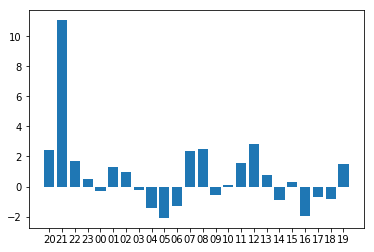

In [70]:
def plot_histogram(times, y):
    times_dict = dict()
    for time, element in zip(times, y):
        if time not in times_dict:
            times_dict[time] = (0,0)
        N =  times_dict[time][1]
        times_dict[time] = ((times_dict[time][0]*N)/(N+1) + element, N+1) 
    bins = times_dict.keys()
    values = [times_dict[item][0] for item in bins]
    plt.bar(list(bins), values, align='center')

corr = correlation_series(pollution_data["mlk-peeples"], traffic_data['mlk-peeples-cam-3'])   
plot_histogram(traffic_data['Time'], corr)

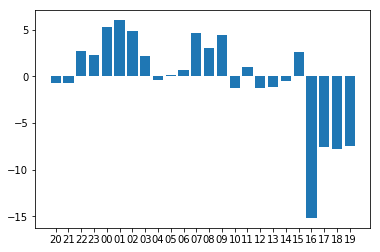

In [71]:
corr = correlation_series(pollution_data['mlk-douglas'], traffic_data['mlk-douglas-cam-1'])
plot_histogram(traffic_data['Time'], corr)